{'A': inf, 'B': inf, 'C': inf, 'D': inf}


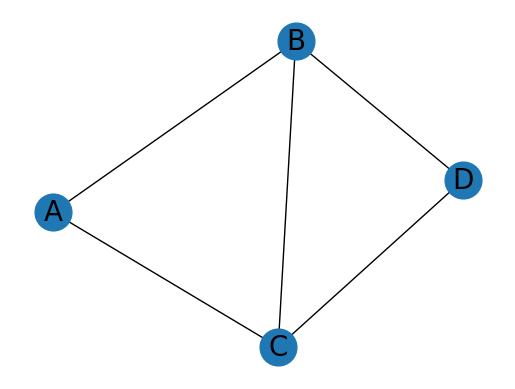

/var/folders/l1/zxqb3jd91vd5nb43cmcd4p180000gn/T/ipykernel_12296/424893202.py:60: DeprecationWarning: `alltrue` is deprecated as of NumPy 1.25.0, and will be removed in NumPy 2.0. Please use `all` instead.
  nx.draw_networkx_edges(G, pos, edgelist=path, width=2.5, edge_color='r')


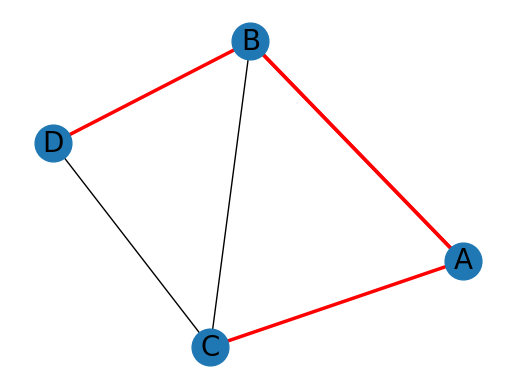

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

def dijkstra(graph, source, distances=None, visited=None):
    if distances is None:
        distances = {node: float('inf') for node in graph}
    if visited is None:
        visited = set()

    if not graph:
        return distances

    visited.add(source)

    for neighbor, weight in graph[source].items():
        new_distance = distances[source] + weight
        if new_distance < distances[neighbor]:
            distances[neighbor] = new_distance

    unvisited_neighbors = {node: distance for node, distance in distances.items() if node not in visited}
    if not unvisited_neighbors:
        return distances

    nearest_node = min(unvisited_neighbors, key=unvisited_neighbors.get)
    return dijkstra(graph, nearest_node, distances, visited)

graph = {
    'A': {'B': 3, 'C': 4},
    'B': {'A': 3, 'C': 1, 'D': 7},
    'C': {'A': 4, 'B': 1, 'D': 5},
    'D': {'B': 7, 'C': 5}
}

source_node = 'A'
shortest_distances = dijkstra(graph, source_node)
print(shortest_distances)

G = nx.Graph()

def plot_graph(graph, shortest_paths=None):
   
    for node, neighbors in graph.items():
        for neighbor, weight in neighbors.items():
            G.add_edge(node, neighbor, weight=weight)
    
    pos = nx.spring_layout(G)  # Positions for all nodes

    # Draw nodes
    nx.draw_networkx_nodes(G, pos, node_size=700)

    # Draw edges
    nx.draw_networkx_edges(G, pos, width=1.0)

    # Draw labels
    nx.draw_networkx_labels(G, pos, font_size=20, font_family="sans-serif")

    # Draw shortest paths if provided
    if shortest_paths:
        for path in shortest_paths:
            nx.draw_networkx_edges(G, pos, edgelist=path, width=2.5, edge_color='r')

    plt.axis("off")
    plt.show()

# Plot the graph without shortest paths
plot_graph(graph)

# Calculate and plot shortest paths
shortest_distances = dijkstra(graph, 'A')
shortest_paths = []
for node in graph:
    path = nx.shortest_path(G, 'A', node)
    shortest_paths.append([(path[i], path[i+1]) for i in range(len(path)-1)])
plot_graph(graph, shortest_paths)